In [2]:
'''
Description: This script is used to calculate the number of contacts between
             a nano-particle and protein residues. This script is used as
             to make some analysis on a simulation of an HSA and a gold 
             nano-particle during my master thesis in June 2023.
Input:       The topology and trajectory files of the system.
Output:      The number of contacts for each frame and the total number of
             contacts for each residue. 
             The results are saved in data1.dat and data2.dat, respectively.
             The names and IDs of residues in contact with NP and the number
             of contacts are saved in data3.dat.
             The unique names and IDs of residues in contact with NP and the
             number of contacts are saved in data4.dat.
             The plots of the number of contacts for each frame and the
             histogram of the number of contacts for each residue are saved
             in data2.png and data4.png, respectively.
Author:      Oveis Mahmoudi
             MSc in Physics and Computational Physics
Email:       oveis.mahmoudi@gmail.com
Affiliation: Université Bourgogne Franche-Comté, Besançon, France
             Laboratoire chrono-environnement, UMR CNRS 6249
Date:        2023-06-15
'''

'\nDescription: This script is used to calculate the number of contacts between\n             a nano-particle and protein residues. This script is used as\n             to make some analysis on a simulation of an HSA and a gold \n             nano-particle during my master thesis in June 2023.\nInput:       The topology and trajectory files of the system.\nOutput:      The number of contacts for each frame and the total number of\n             contacts for each residue. \n             The results are saved in data1.dat and data2.dat, respectively.\n             The names and IDs of residues in contact with NP and the number\n             of contacts are saved in data3.dat.\n             The unique names and IDs of residues in contact with NP and the\n             number of contacts are saved in data4.dat.\n             The plots of the number of contacts for each frame and the\n             histogram of the number of contacts for each residue are saved\n             in data2.png and da

# 1HSA+1AU (G=1)
source: https://nbviewer.org/github/MDAnalysis/binder-notebook/blob/master/notebooks/analysis/solvent-exposed-residues.ipynb

In [1]:
import MDAnalysis as mda

## Import

In [1]:
%matplotlib inline
from contact_module import *

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Inputs

In [ ]:
path              = './2___1H1A_D5G1/Traj_3us/'
tpr_file          = 'centered_prot_np.tpr'
xtc_file          = 'centered_prot_np.xtc'
protein_selection = 'name BB SC1 SC2 SC3'
nano_selection    = 'name MM A0 A1 A2 A3'

# Output files to save the results
data_1 = 'data1.dat'    # the total num of contacts for each residue
data_2 = 'data2.dat'    # the results for each frame
data_3 = 'data3.dat'    # the names and IDs of residues in contact with NP and the number of contacts in a file
data_4 = 'data4.dat'    # Unique names and IDs of residues in contact with NP and the number of contacts

## Initialization

In [15]:
# Initialization
u, protein, nano = initialize(path+tpr_file, path+xtc_file)

resid_ls   = list(protein.atoms.residues.resids)
resname_ls = list(protein.atoms.residues.resnames)
res_dict   = dict(zip(resid_ls, resname_ls))

print("No. of IDs: {} \nNo. of resnames: {}".format(len(resid_ls), len(resname_ls)))

No. of IDs: 578 
No. of resnames: 578


## Main

In [3]:
count_total   = np.zeros((u.trajectory.n_frames, 2))   # (time, N_exposed)
count_residue = np.zeros((u.trajectory.n_frames, len(res_dict.values())+1))   # (time, N_exposed)

for i, ts in enumerate(u.trajectory):
    if i%100 == 0:
        print(i)
    
    res_in_contact = get_residues_in_contact(protein, nano, dmax=8.0)
    
    for item in res_dict.keys():
        res_dict[item] = int((res_in_contact.resids==item).sum())
    
    count_total[i, :]   = (ts.time, res_in_contact.n_residues)
    count_residue[i, :] = (ts.time, *res_dict.values())


# Put the results in a list
res_connected_num = np.zeros(len(res_dict.values()), dtype=int)
for i in range(len(res_connected_num)):
    res_connected_num[i] =int(sum(count_residue[:, i+1]))
print(res_connected_num)
print(len(res_connected_num))


# Save the total num of contacts for each residue
with open(path+data_1, 'w') as f:
    f.write('# resid\tN_contacts\n')
    for i in range(len(resid_ls)):
        f.write('{}\t{}\t{}\n'.format(resname_ls[i], resid_ls[i], res_connected_num[i]))
print('\ndata1.dat saved in {}.'.format(path))
        
# Save the results for each frame
with open(path+data_2, 'w') as f:
    f.write('# time (ns)\tN_contacts\n')
    for i in range(np.shape(count_total)[0]):
        f.write('{}\t{}\n'.format(count_total[i,0]/1000, count_total[i,1]))
print('\ndata2.dat saved in {}.'.format(path))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [4]:
# Find the index of the residues with non-zero values and give the residue name and number
connection_number = []
connected_res_name = []
connected_res_id = []
for i in range(len(res_connected_num)):
    if res_connected_num[i] != 0:
        connection_number.append(res_connected_num[i])
        connected_res_name.append(resname_ls[i])
        connected_res_id.append(resid_ls[i])
print(connection_number)
print(connected_res_name)
print(connected_res_id)

[18, 363, 68, 20, 352, 110, 29, 1958, 431, 5, 19, 234, 7, 1, 948, 1650, 5992, 17115, 721, 11849, 571, 24016, 23389, 2150, 24071, 24860, 3237, 22593, 24993, 23626, 22827, 20552, 1788, 233, 90, 3, 52, 178, 1, 8, 1, 2274, 118, 3, 11479, 1678, 62, 11877, 23731, 21874, 13091, 24723, 25142, 24616, 25026, 22865, 25044, 683, 462, 133, 9, 78, 1, 18, 1, 4, 28, 16, 19, 1, 141, 342, 1, 20, 1, 2, 2, 9, 2, 53, 108, 15, 62, 158, 1, 158, 36, 10, 34, 1, 1596, 4502, 1758, 376, 4611, 12937, 1563, 1561, 277, 79, 1211, 2, 2, 152, 11, 537, 335, 110, 727, 313, 457, 31, 197, 105, 36, 71, 106, 1, 3, 53, 73, 18, 1342, 833, 205, 4946, 13628, 1869, 1636, 210, 5741, 150, 93, 7, 1, 61, 102, 3, 482, 38, 18, 126, 151, 350, 161, 173, 289]
['GLU', 'GLU', 'LYS', 'PHE', 'GLU', 'ASP', 'VAL', 'LYS', 'ASN', 'THR', 'GLU', 'LYS', 'LEU', 'PRO', 'ARG', 'LEU', 'VAL', 'ARG', 'PRO', 'GLU', 'VAL', 'ASP', 'VAL', 'MET', 'CYS', 'THR', 'ALA', 'PHE', 'HIS', 'ASP', 'ASN', 'GLU', 'GLU', 'THR', 'PHE', 'LEU', 'LYS', 'LYS', 'TYR', 'PHE', 'AL

In [6]:
# Save the names and IDs of residues in contact with NP and the number of 
# contacts in a file
with open(path+data_3, 'w') as f:
    f.write('# resid\tresname\tN_contacts\n')
    for i in range(len(connected_res_name)):
        f.write('{}\t{}\t{}\n'.format(connected_res_name[i],
                                      connected_res_id[i],
                                      connection_number[i]))
print('\ndata3.dat saved in {}.'.format(path))

# Find the unique residue names and the number of residues in contact with NP
name_new, num_new = uniqize(connected_res_name, connection_number)

with open(path+data_4, 'w') as f:
    f.write('# resid\tresname\tN_contacts\n')
    for i in range(len(name_new)):
        f.write('{}\t{}\n'.format(name_new[i], num_new[i]))
print('\ndata4.dat saved in {}.'.format(path))


data3.dat saved in ./2___1H1A_D5G1/Traj_3us/.
['GLU', 'LYS', 'PHE', 'ASP', 'VAL', 'ASN', 'THR', 'LEU', 'PRO', 'ARG', 'MET', 'CYS', 'ALA', 'HIS', 'TYR', 'GLN', 'SER', 'ILE']
[59215, 64268, 34673, 74413, 30162, 23292, 61969, 3320, 754, 19553, 2150, 71787, 63381, 26591, 162, 25788, 1913, 376]

data4.dat saved in ./2___1H1A_D5G1/Traj_3us/.


## Plot: Histogram

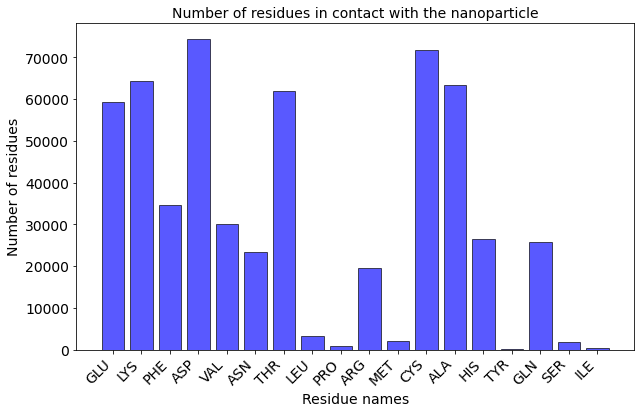

In [8]:
histo_from_file(path+'data4.dat')

## Plot: Conntacts vs Time

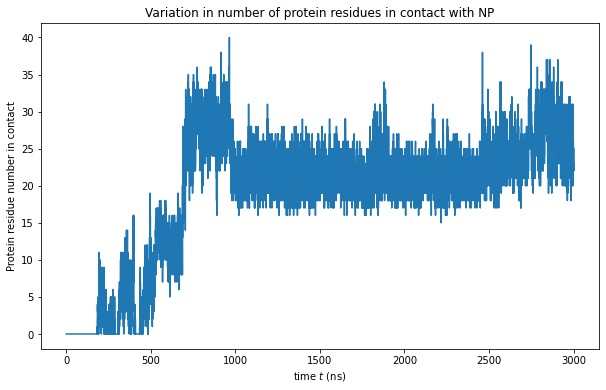

In [9]:
contact_plot(path+"data2.dat", dmax=8.0)

In [16]:
data = np.loadtxt(path+"data2.dat")
time = data[:, 0]
contact = data[:, 1]
# find the index of the first frame with contact
for i in range(len(contact)):
    if contact[i] != 0:
        print("\n The frame of the first contact: ", i)
        print("\n The time of the first contact: ", time[i])
        break

frame of first contact:  1836
Time of first contact:  183.6


# HSA Residues

/home/ubuntu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


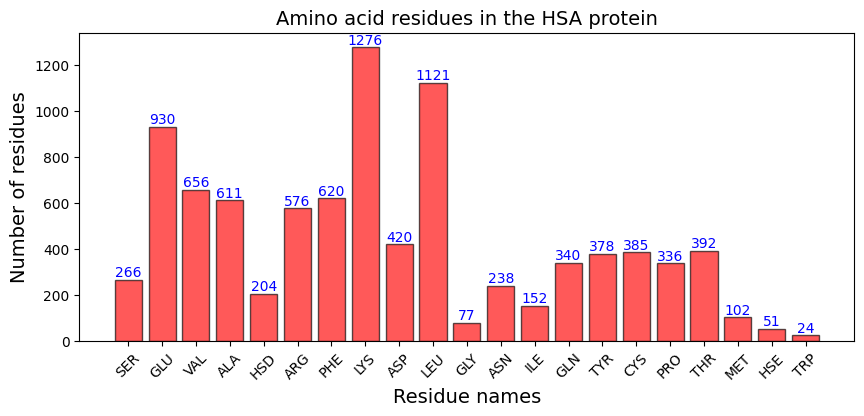

In [1]:
from contact_module import *

amino_acids = ['SER', 'GLU', 'VAL', 'ALA', 'HSD', 'ARG', 'PHE', 'LYS',
               'ASP', 'LEU', 'GLY', 'ASN', 'ILE', 'GLN', 'TYR', 'CYS',
               'PRO', 'THR', 'MET', 'HSE', 'TRP']

numbers = [266, 930, 656, 611, 204, 576, 620, 1276, 420, 1121, 77, 238, 
           152, 340, 378, 385, 336, 392, 102, 51, 24]

path = './Outputs/'
output_file = '5_hsa_residues.pdf'

histo_from_list(amino_acids,
                numbers,
                save   = True,
                title  = 'Amino acid residues in the HSA protein',
                output = path + output_file)

['GLU' 'LYS' 'PHE' 'ASP' 'VAL' 'ASN' 'THR' 'LEU' 'PRO' 'ARG' 'MET' 'CYS'
 'ALA' 'HIS' 'TYR' 'GLN' 'SER' 'ILE']

# 1HSA+1AU (G=0.1)

## Initialize

In [5]:
path              = './3___1H1A_D5G0.1/Traj/'
xtc_file          = 'centered_prot_np.xtc'
tpr_file          = 'centered_prot_np.tpr'
protein_selection = 'name BB SC1 SC2 SC3'
nano_selection    = 'name MM A0 A1 A2 A3'

# Output files to save the results
data_1 = 'data1.dat'    # total num of contacts for each residue
data_2 = 'data2.dat'    # results for each frame
data_3 = 'data3.dat'    # names and IDs of residues in contact with NP and the
                        # number of contacts
data_4 = 'data4.dat'    # Unique names and IDs of residues in contact with NP 
                        # and the number of contacts

# Initialization
u, protein, nano = initialize(path+tpr_file, path+xtc_file)

resid_ls   = list(protein.atoms.residues.resids)
resname_ls = list(protein.atoms.residues.resnames)
res_dict   = dict(zip(resid_ls, resname_ls))

print("No. of IDs: {} \nNo. of resnames: {}".format(len(resid_ls), len(resname_ls)))

No. of IDs: 578 
No. of resnames: 578


## Main

In [6]:
count_total   = np.zeros((u.trajectory.n_frames, 2))   # (time, N_exposed)
count_residue = np.zeros((u.trajectory.n_frames,len(res_dict.values())+1))   # (time, N_exposed)

for i, ts in enumerate(u.trajectory):
    if i%100 == 0:
        print(i)
    in_contact_residues = get_residues_in_contact(protein, nano, dmax=8.0)
    
    for item in res_dict.keys():
        res_dict[item] = int((in_contact_residues.resids==item).sum())
    
    count_total[i, :]   = (ts.time, in_contact_residues.n_residues)
    count_residue[i, :] = (ts.time, *res_dict.values())


# Put the results in a list
res_connected_num = np.zeros(len(res_dict.values()), dtype=int)
for i in range(len(res_connected_num)):
    res_connected_num[i] =int(sum(count_residue[:, i+1]))

print(res_connected_num)
print(len(res_connected_num))


# Save the total num of contacts for each residue
with open(path+data_1, 'w') as f:
    f.write('# resid\tN_contacts\n')
    for i in range(len(resid_ls)):
        f.write('{}\t{}\t{}\n'.format(resname_ls[i], resid_ls[i], res_connected_num[i]))
print('\ndata1.dat saved in {}.'.format(path))
        
# Save the results for each frame
with open(path+data_2, 'w') as f:
    f.write('# time (ns)\tN_contacts\n')
    for i in range(np.shape(count_total)[0]):
        f.write('{}\t{}\n'.format(count_total[i,0]/1000, count_total[i,1]))
print('\ndata2.dat saved in {}.'.format(path))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [7]:
# Find the index of the residues with non-zero values and give the residue name and number
connection_number = []
connected_res_name = []
connected_res_id = []
for i in range(len(res_connected_num)):
    if res_connected_num[i] != 0:
        connection_number.append(res_connected_num[i])
        connected_res_name.append(resname_ls[i])
        connected_res_id.append(resid_ls[i])
print(connection_number)
print(connected_res_name)
print(connected_res_id)
name_new, num_new = uniqize(connected_res_name, connection_number)
print(name_new)
print(num_new)

[90, 2, 92, 8, 8, 75, 113, 109, 6, 64, 8, 41, 13, 1025, 10, 1310, 82, 832, 647, 1, 340, 3, 9, 23, 287, 646, 34, 905, 1441, 3, 34, 15, 21, 412, 322, 845, 428, 29, 589, 19, 574, 1125, 1240, 2, 5607, 4626, 15494, 7323, 17, 555, 7613, 1072, 1, 490, 2951, 96, 13, 7, 237, 103, 30, 34, 1, 12, 4, 28, 19, 1610, 126, 1, 776, 4634, 1409, 1748, 5606, 5839, 8014, 9690, 3391, 10568, 4457, 535, 663, 91, 1956, 1, 777, 1247, 29, 579, 1089, 39, 2, 636, 122, 83, 680, 532, 382, 381, 31, 10, 151, 69, 10, 3, 1, 78, 2, 32, 46, 9, 3558, 4001, 54, 3997, 36, 120, 3194, 495, 30, 10, 19, 6, 167, 1116, 542, 136, 2580, 2913, 1356, 40, 35, 1, 82, 36, 61, 1, 2, 4]
['SER', 'GLU', 'HIS', 'LYS', 'VAL', 'ALA', 'ASP', 'GLU', 'SER', 'ASP', 'GLN', 'LYS', 'PHE', 'LYS', 'ALA', 'GLU', 'PHE', 'ALA', 'GLU', 'SER', 'LYS', 'ASP', 'LYS', 'TYR', 'GLU', 'ASN', 'GLN', 'ASP', 'SER', 'ILE', 'SER', 'LYS', 'GLU', 'PRO', 'ALA', 'ASP', 'LEU', 'PRO', 'SER', 'LEU', 'ALA', 'ALA', 'ASP', 'VAL', 'GLU', 'SER', 'LYS', 'ASP', 'VAL', 'CYS', 'LYS', '

In [8]:
# Save the names and IDs of residues in contact with NP and the number of 
# contacts in a file
with open(path+data_3, 'w') as f:
    f.write('# resid\tresname\tN_contacts\n')
    for i in range(len(connected_res_name)):
        f.write('{}\t{}\t{}\n'.format(connected_res_name[i],
                                      connected_res_id[i],
                                      connection_number[i]))
print('\ndata3.dat saved in {}.'.format(path))


# Save the unique names and IDs of residues in contact with NP and the number of
# contacts
with open(path+data_4, 'w') as f:
    f.write('# resid\tresname\tN_contacts\n')
    for i in range(len(name_new)):
        f.write('{}\t{}\n'.format(name_new[i], num_new[i]))
print('\ndata4.dat saved in {}.'.format(path))


data3.dat saved in ./3___1H1A_D5G0.1/Traj/.
['SER', 'GLU', 'HIS', 'LYS', 'VAL', 'ALA', 'ASP', 'GLN', 'PHE', 'TYR', 'ASN', 'ILE', 'PRO', 'LEU', 'CYS', 'MET', 'ARG', 'THR']
[7297, 25279, 10738, 36415, 483, 23245, 27105, 659, 228, 761, 2428, 3, 4963, 1634, 4302, 30, 4087, 3285]

data4.dat saved in ./3___1H1A_D5G0.1/Traj/.


## Plot: Histogram

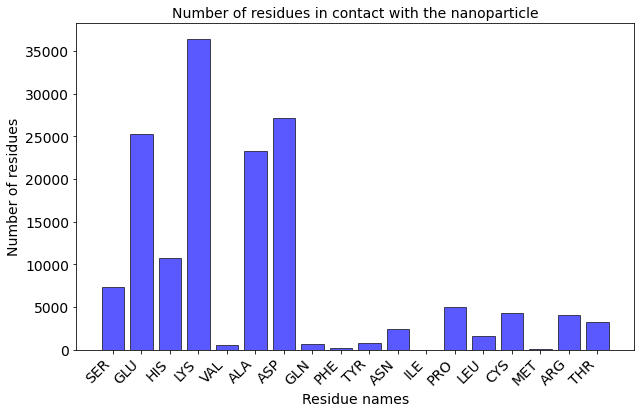

In [9]:
histo_from_file(path+'data4.dat')  # Plot the histogram

## Plot: Conntacts vs Time

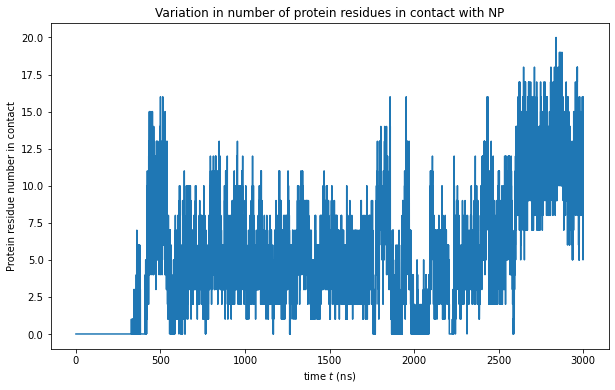

In [10]:
contact_plot(path+data_2, dmax=8.0) # Plot the contact plot

In [13]:
data = np.loadtxt(path+"data2.dat")
time = data[:, 0]
contact = data[:, 1]
# find the index of the first frame with contact
for i in range(len(contact)):
    if contact[i] != 0:
        print("frame of first contact: ", i)
        print("Time of first contact: ", time[i])
        break

frame of first contact:  3276
Time of first contact:  327.6


# Contact Average Plot

In [1]:
%matplotlib inline
from contact_module import *

path_1 = './2___1H1A_D5G1/Traj_3us/'
path_2 = './3___1H1A_D5G0.1/Traj/'

data_1 = np.loadtxt(path_1+"data2.dat")
data_2 = np.loadtxt(path_2+"data2.dat")

# arr_1 = np.zeros(len(data_1))
# arr_2 = np.zeros(len(data_2))

arr_1 = data_1[:, 1]
arr_2 = data_2[:, 1]

time = data_1[1::20, 0]
print(time)
print(len(time))

[1.0000e-01 2.1000e+00 4.1000e+00 ... 2.9941e+03 2.9961e+03 2.9981e+03]
1500


In [2]:
av_1 = compute_average_per_100(data_1[1:, 1])
av_2 = compute_average_per_100(data_2[1:, 1])

print(av_1)
print(av_2)

[ 0  0  0 ... 26 23 23]
[ 0  0  0 ... 11 12  9]


In [3]:
arr_1 = insert_average(arr_1, av_1)
arr_2 = insert_average(arr_2, av_2)

print(arr_1)

[ 0.  0.  0. ... 24. 22. 25.]


In [4]:
# Find the first non-zero value in av_1
for i in range(len(av_1)):
    if av_1[i] != 0:
        contact_time_1 = time[i]
        print("frame of first contact: ", i)
        print("Time of first contact: ", time[i])
        break

# Find the first non-zero value in av_2
for i in range(len(av_2)):
    if av_2[i] != 0:
        contact_time_2 = time[i]
        print("frame of first contact: ", i)
        print("Time of first contact: ", time[i])
        break


frame of first contact:  92
Time of first contact:  184.1
frame of first contact:  178
Time of first contact:  356.1


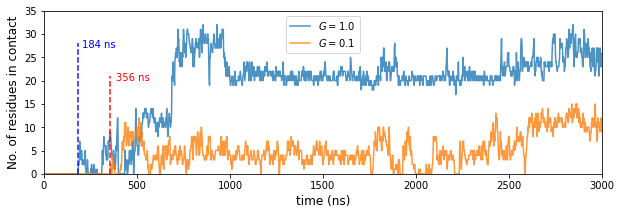

In [5]:
plt.figure(figsize=(10, 3))
# plt.title(r"Variation in number of protein residues in contact with NP")
plt.plot(time, av_1, label=r"$G=1.0$", alpha=0.8)
plt.plot(time, av_2, label=r"$G=0.1$", alpha=0.8)
plt.xlabel(r"time (ns)", fontsize=12)
plt.ylabel("No. of residues in contact", fontsize=12)

plt.xlim(0, 3000)
plt.ylim(0, 35)
# plt.yticks(np.arange(0, 50, 2))
plt.legend()

# Put a vertical line at the time of first non-zero contact
plt.axvline(x=contact_time_1, color='blue', linestyle='--', alpha=0.9, ymax=0.8)
plt.axvline(x=contact_time_2, color='red' , linestyle='--', alpha=0.9, ymax=0.6)

plt.text(contact_time_1+20, 27, str(int(contact_time_1))+" ns", color='blue')
plt.text(contact_time_2+30, 20, str(int(contact_time_2))+" ns", color='red')

# plt.savefig("./Outputs/"+"contact_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Histogram Merger

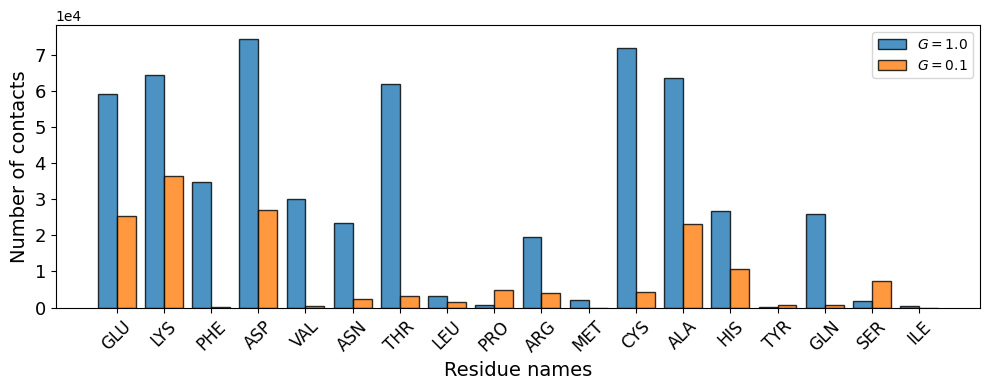

In [122]:
data_1 = np.loadtxt(path_1+"data4.dat", dtype=str)
data_2 = np.loadtxt(path_2+"data4.dat", dtype=str)

num_1 = data_1[:, 1].astype(int)
num_2 = data_2[:, 1].astype(int)

name_1 = data_1[:, 0]
name_2 = data_2[:, 0]
name_3 = data_1[:, 0]

# Check that in contact residues are the same in both files
# print(name_1)
# print(name_2)
# print(name_3)
for item in name_2:
    if item not in name_1:
        name_3 = np.append(name_3, item)
# print(name_3)

num_3 = np.zeros((len(name_3), 2), dtype=int)

for i in range(len(name_3)):
    if name_3[i] in name_1:
        # find the index of the residue in name_1
        index = np.where(name_1==name_3[i])[0][0]
        num_3[i, 0] = num_1[index]
    if name_3[i] in name_2:
        # find the index of the residue in name_2
        index = np.where(name_2==name_3[i])[0][0]
        num_3[i, 1] = num_2[index]
# num_3

# Import ScalarFormatter
I = np.arange(1, len(name_3)+1, 1)
plt.figure(figsize=(10, 4))
plt.bar(I-0.2, num_3[:,0], 0.4, edgecolor='k', alpha=0.8, label=r"$G=1.0$")
plt.bar(I+0.2, num_3[:,1], 0.4, edgecolor='k', alpha=0.8, label=r"$G=0.1$")

plt.xlabel('Residue names', fontsize=14)
plt.ylabel('Number of contacts', fontsize=14)

plt.xticks(I, name_3, fontsize=12, rotation=45)#, ha='right', va='top')
plt.yticks(fontsize=13)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.legend()#fontsize=12)
plt.tight_layout()
plt.savefig("./Outputs/"+'1H1A_res_cont_comp.png', format='png', dpi=300)
plt.show()